In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

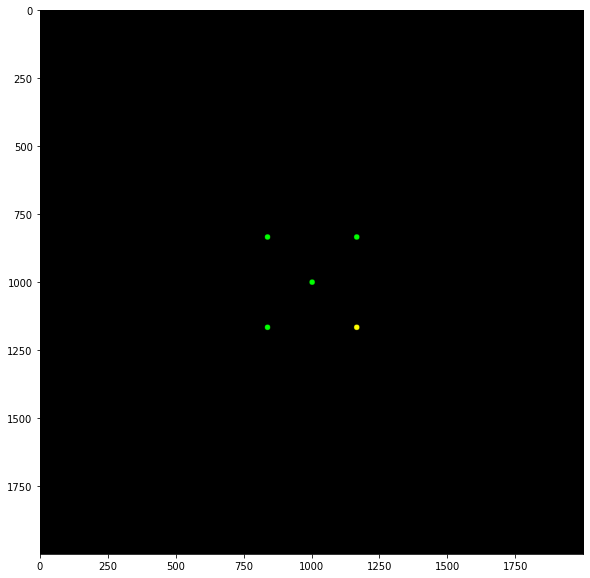

In [14]:
scale_y = 41         #1 meter in real world coordinates
scale_x = 41.5      #1 meter in real world coordinates 

#create an image
img_h = 2000
img_w = 2000
base_image = np.zeros((img_h,img_w,3),dtype=np.uint8)

#camera positions
camera_positions = np.array([(4,4),(-4,4),(-4,-4),(4,-4),(0,0)]) #camera locations in xacro files(joints)
#I don't need the "spacing" parameter because my camera position is the actual distances

#the top of the camera faces the x direction in gazebo

#multiply by -1 and fliplr to align image and camera
cam_locations = -1*camera_positions*(scale_x,scale_y) + (img_w/2,img_h/2)
cam_locations = np.fliplr(cam_locations)

for px,py in cam_locations:
    px,py = int(px),int(py)
    cv2.circle(base_image,(px,py),10,(0,255,0),-1)
    
x = int(cam_locations[2,0])
y = int(cam_locations[2,1])
cv2.circle(base_image,(x,y),10,(255,255,0),-1)
plt.figure(figsize=(10,10))
plt.imshow(base_image)   

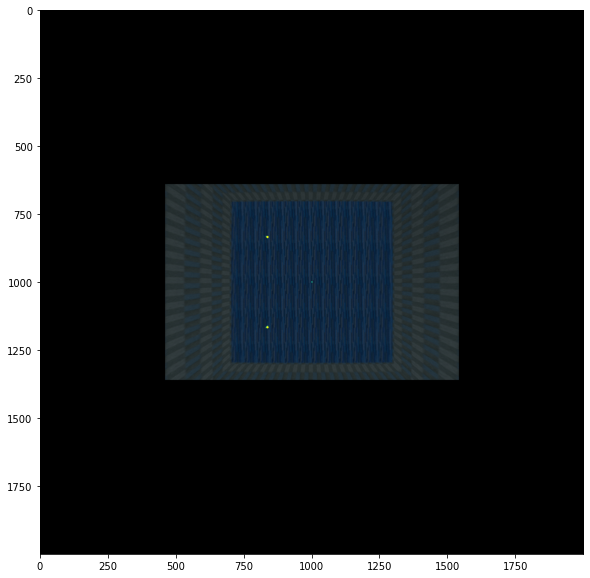

In [22]:
base_copy = base_image.copy()
path5 = "test_img.png"

img5 = cv2.imread(path5)
# offset_x = int(cam_locations[0,0] - img5.shape[1]/2)  #put the center of the image on the dot made
# offset_y = int(cam_locations[0,1] - img5.shape[0]/2)
# y1,y2 = offset_y,offset_y + img5.shape[0]
# x1,x2 = offset_x,offset_x + img5.shape[1]
# base_copy[y1:y2,x1:x2] = img_rgb5



offset_x = int(cam_locations[4,0] - img5.shape[1]/2)
offset_y = int(cam_locations[4,1] - img5.shape[0]/2)
y1,y2 = offset_y,offset_y + img5.shape[0]
x1,x2 = offset_x,offset_x + img5.shape[1]
base_copy[y1:y2,x1:x2] = img5

x = int(cam_locations[0,0])
y = int(cam_locations[0,1])
xx = int(cam_locations[1,0])
yy = int(cam_locations[1,1])
cv2.circle(base_copy,(xx,yy),4,(255,255,0),-1)
cv2.circle(base_copy,(x,y),4,(255,255,0),-1)
plt.figure(figsize=(10,10))
plt.imshow(base_copy)
# base_resize = cv2.resize(base_copy,(600,600))
# cv2.imshow("frame",base_resize)
# cv2.waitKey(0)